**Executive Summary**

Rossmann operates over 3,000 drug stores across seven European countries, requiring each store manager to forecast daily sales up to six weeks in advance to manage inventory, staffing, and promotions effectively. Sales volume is driven by multiple factors—promotions, competition, holiday effects, seasonality, and local market dynamics—leading to considerable variability in manually produced forecasts. Leveraging the public Rossmann Store Sales dataset from the 2015 Kaggle competition, this project will apply the full data science lifecycle to build and evaluate time series and machine learning forecasting models (e.g., ARIMA, Prophet, XGBoost). By comparing model outputs to actual sales, we aim to deliver a robust, data-driven forecasting tool that reduces prediction error, enhances inventory planning, and supports consistent decision-making across all Rossmann stores (kaggle.com).


In [191]:
# Importing libraries--> 

import pandas as pd
import seaborn as sns
import numpy as py
import matplotlib.pyplot as plt





In [192]:
# --> Reading data from downloaded source files

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("store.csv")
sample_submission = pd.read_csv("sample_submission.csv")

train.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8592\929968003.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


**Getting a quick and detailed statistics for all DataFrames**

In [193]:
# Basic info (columns, data types, memory usage)
print("TRAIN INFO:")
print(train.info())
print("\nTEST INFO:")
print(test.info())
print("\nSTORE INFO:")
print(store.info())
print("\nSAMPLE SUBMISSION INFO:")
print(sample_submission.info())


TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

TEST INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non

**Numerical and categorical summary stats**

In [194]:

# Numerical and categorical summary stats
print("\nTRAIN DESCRIPTION:")
print(train.describe(include='all'))  # include='all' shows numeric + categorical

print("\nTEST DESCRIPTION:")
print(test.describe(include='all'))

print("\nSTORE DESCRIPTION:")
print(store.describe(include='all'))

print("\nSAMPLE SUBMISSION DESCRIPTION:")
print(sample_submission.describe(include='all'))





TRAIN DESCRIPTION:
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHol

**Data Cleansing**
Activities to correct or remove dirty, inconsistent, or incomplete data

In [195]:
# --> Removing duplicates
# Put all your DataFrames into a dictionary
dfs = {
    "train": train,
    "test": test,
    "store": store,
    "sample_submission": sample_submission
}

# Example: Removing duplicates
for name, df in dfs.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: Removed {before - after} duplicates")


train: Removed 0 duplicates
test: Removed 0 duplicates
store: Removed 0 duplicates
sample_submission: Removed 0 duplicates


In [196]:
# --> Handle missing values

# --> checking for missing value

for name, df in dfs.items():
    print(f"\n{name} Missing Values:\n", df.isnull().sum())



train Missing Values:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

test Missing Values:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

store Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

sample_submission Missing Values:
 Id       0
Sales    0
dtype: int64


In [197]:
# Example for train dataset:
 # train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
# store['PromoInterval'].fillna('Unknown', inplace=True)

**Correcting data types**

In [198]:
train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
store['Store'] = store['Store'].astype(int)


**Fixing typos / inconsistencies**

In [199]:
# Standardising strings
store['StoreType'] = store['StoreType'].str.strip().str.lower()
store['Assortment'] = store['Assortment'].str.strip().str.lower()


**Normalising data formats**

In [200]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')


**Filter invalid entries**

In [201]:
# Example: Sales should be >= 0
train = train[train['Sales'] >= 0]

# Example: Customers should be >= 0
train = train[train['Customers'] >= 0]



In [202]:
# --> After cleaning, check again

for name, df in dfs.items():
    print(f"\n{name} Data Types:\n", df.dtypes)
    print(f"{name} Missing Values:\n", df.isnull().sum())



train Data Types:
 Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object
train Missing Values:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

test Data Types:
 Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object
test Missing Values:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

store Data Types:
 Store                  

In [203]:
# --> Reading data from downloaded source files

train.head()
# test.head()
# store.head()
# sample_submission.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


**The 2 cells above have been changed to RAW fieldtype because I don't want to run it.**

**write one single cleaning function so you just call:**

**The 2 cells above have been changed to RAW fieldtype because I don't want to run it.**

**Data Wrangling**

**Step 1: Merge train and store**

In [204]:
# Merge train with store data
train_merged = pd.merge(train, store, on="Store", how="left")

# Merge test with store data
test_merged = pd.merge(test, store, on="Store", how="left")

print(train_merged.shape, test_merged.shape)
train_merged.head()


(1017209, 18) (41088, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Step 2: Convert Dates & Extract Features**

In [205]:
# Convert to datetime
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
test_merged['Date'] = pd.to_datetime(test_merged['Date'])

# Extract features
for df in [train_merged, test_merged]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek


**Step 3: Reshape Data (Optional)**

In [206]:
# Example: Pivot sales per store over time
sales_pivot = train_merged.pivot_table(
    values="Sales",
    index="Date",
    columns="Store",
    aggfunc="sum"
)
sales_pivot.head()


Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1

**Step 4: Final Check**

In [207]:
print(train_merged.info())
print(test_merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int32         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

**Handling of Missing Data**

In [208]:
# Fill numeric nulls with 0 for features where NaN means "no event"
for col in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2SinceWeek', 'Promo2SinceYear']:
    train_merged[col] = train_merged[col].fillna(0)
    test_merged[col] = test_merged[col].fillna(0)

# Fill categorical nulls with 'None'
train_merged['PromoInterval'] = train_merged['PromoInterval'].fillna('None')
test_merged['PromoInterval'] = test_merged['PromoInterval'].fillna('None')


**Feature engineering, which comes after basic cleaning and wrangling, is crucial if we want the dataset to be ready for analysis or modelling.**

**1. Create new variables**
We can generate new columns from existing data to give models richer information.
For example, in the Rossmann dataset:



In [209]:
# Extract date features
for df in [train_merged, test_merged]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week


**2. Encode categorical variables**


In [210]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['StoreType', 'Assortment']:
    train_merged[col] = encoder.fit_transform(train_merged[col])
    test_merged[col] = encoder.transform(test_merged[col])

# One-hot encoding example
train_merged = pd.get_dummies(train_merged, columns=['PromoInterval'])
test_merged = pd.get_dummies(test_merged, columns=['PromoInterval'])


**3. Parse complex fields**

Some fields store multiple pieces of information together.
For example, PromoInterval is a string of months ("Feb,May,Aug,Nov"), which can be turned into binary columns like PromoFeb, PromoMay, etc.

**4. Group/Aggregate data**
    
For store-level summaries:

In [211]:
sales_by_store = train_merged.groupby('Store')['Sales'].mean().reset_index(name='AvgSales')
train_merged = train_merged.merge(sales_by_store, on='Store', how='left')


**5. Handle outliers**

Outliers in sales or customers can distort models.
For example:

5. Handle outliers
Outliers in sales or customers can distort models.
For example:

In [212]:
import numpy as np
q1 = train_merged['Sales'].quantile(0.25)
q3 = train_merged['Sales'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

train_merged = train_merged[(train_merged['Sales'] <= upper_bound) & (train_merged['Sales'] >= lower_bound)]


**Filling Missing Value for Store_Dataset**

In [213]:
# Fill missing values: numeric with median, categorical with mode
for col in store.columns:
    if store[col].dtype in ['int64', 'float64']:
        store[col] = store[col].fillna(store[col].median())
    else:
        store[col] = store[col].fillna(store[col].mode()[0])


# Strip spaces in string columns
store = store.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Ensure correct types
if 'Store' in store.columns:
    store['Store'] = store['Store'].astype(int)

# ------------------------------
# 3. Export cleaned store data
# ------------------------------
store.to_csv("store_cleaned.csv", index=False)
print("✅ Cleaned store data saved as 'store_cleaned.csv'")

✅ Cleaned store data saved as 'store_cleaned.csv'


C:\Users\pc\AppData\Local\Temp\ipykernel_8592\1146349738.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  store = store.applymap(lambda x: x.strip() if isinstance(x, str) else x)


**4. Perform comprehensive Exploratory Data Analysis (EDA)**

In [214]:
# 4. Import cleaned train, test, and store data
# ------------------------------
train_df = pd.read_csv("train_feature_engineered.csv")
test_df = pd.read_csv("test_feature_engineered.csv")
store_df = pd.read_csv("store_feature_engineered.csv")


# ------------------------------
# 5. Merge store info into train & test
# ------------------------------
train_merged = pd.merge(train_df, store_df, on="Store", how="left")
test_merged = pd.merge(test_df, store_df, on="Store", how="left")


# ------------------------------
# 6. Save merged versions
# ------------------------------
train_merged.to_csv("train_merged_cleaned.csv", index=False)
test_merged.to_csv("test_merged_cleaned.csv", index=False)


In [215]:
print("✅ Merged datasets saved as 'train_merged_cleaned.csv' and 'test_merged_cleaned.csv'")
print(f"Train shape: {train_merged.shape}, Test shape: {test_merged.shape}")

✅ Merged datasets saved as 'train_merged_cleaned.csv' and 'test_merged_cleaned.csv'
Train shape: (990515, 49), Test shape: (41088, 45)


***Exploratory Data Analysis (EDA)***

In [6]:
# ============================
# ROSSANN EDA SCRIPT WITH PDF
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fpdf import FPDF
from datetime import datetime

# ----------------------------
# 1. Load Cleaned Data
# ----------------------------
train_df = pd.read_csv("train_feature_engineered.csv")
test_df = pd.read_csv("test_feature_engineered.csv")
store_df = pd.read_csv("store_cleaned.csv")


# Merge store info back
train_merged = pd.merge(train_df, store_df, on="Store", how="left")
test_merged = pd.merge(test_df, store_df, on="Store", how="left")

# Create folder for saving outputs
output_dir = "EDA_Results"
os.makedirs(output_dir, exist_ok=True)

In [7]:
# ------------------------------
# 3. Basic dataset info
# ------------------------------
print("\nTrain dataset info:")
print(train_df.info())
print("\nMissing values in train:")
print(train_df.isnull().sum())


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990515 entries, 0 to 990514
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      990515 non-null  int64  
 1   DayOfWeek                  990515 non-null  int64  
 2   Date                       990515 non-null  object 
 3   Sales                      990515 non-null  int64  
 4   Customers                  990515 non-null  int64  
 5   Open                       990515 non-null  int64  
 6   Promo                      990515 non-null  int64  
 7   SchoolHoliday              990515 non-null  int64  
 8   StoreType                  990515 non-null  int64  
 9   Assortment                 990515 non-null  int64  
 10  CompetitionDistance        987893 non-null  float64
 11  CompetitionOpenSinceMonth  990515 non-null  float64
 12  CompetitionOpenSinceYear   990515 non-null  float64
 13  Promo2  

**Understanding the target variable (Sales) Distribution**

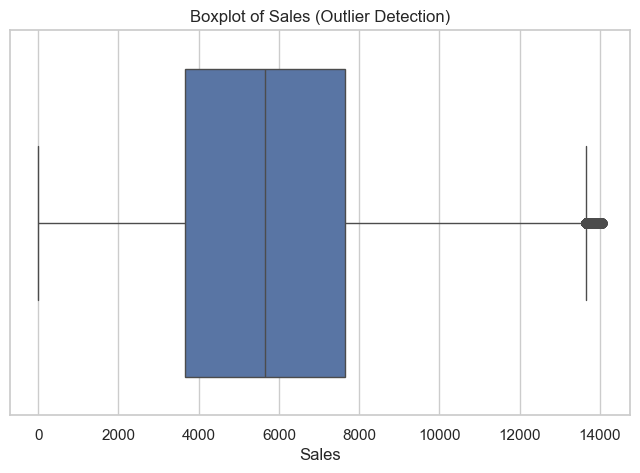

In [10]:
# ----------------------------
# 2. Target Variable Analysis
# ----------------------------
plt.figure(figsize=(8,5))
sns.histplot(train_merged['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.savefig(f"{output_dir}/sales_distribution.png")
plt.close()

plt.figure(figsize=(8,5))
sns.boxplot(x=train_merged['Sales'])
plt.title("Boxplot of Sales (Outlier Detection)")
plt.show()
plt.savefig(f"{output_dir}/sales_boxplot.png")
plt.close()

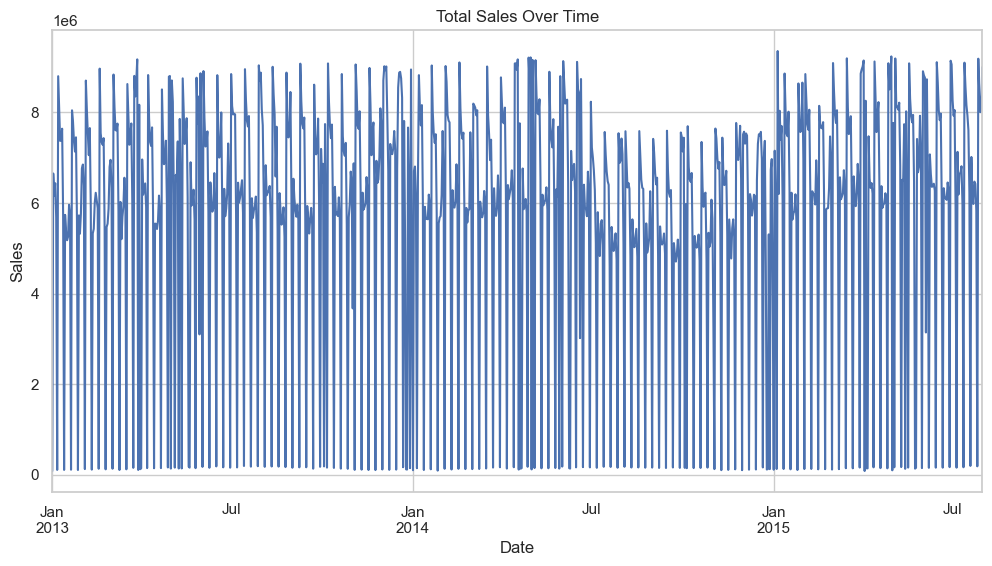

In [11]:
# ----------------------------
# 3. Sales Over Time
# ----------------------------
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
sales_over_time = train_merged.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12,6))
sales_over_time.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
plt.savefig(f"{output_dir}/sales_over_time.png")
plt.close()


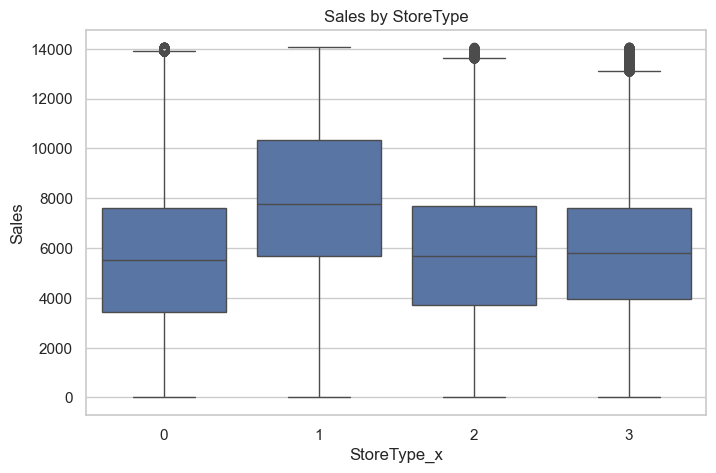

In [14]:
# ----------------------------
# 4. Sales by StoreType
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="StoreType_x", y="Sales", data=train_merged)
plt.title("Sales by StoreType")
plt.show()
plt.savefig(f"{output_dir}/sales_by_storetype.png")
plt.close()

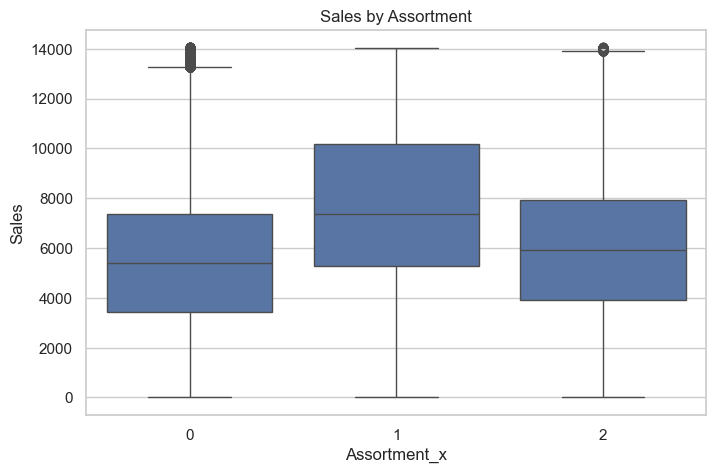

In [15]:
# ----------------------------
# 5. Sales by Assortment
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Assortment_x", y="Sales", data=train_merged)
plt.title("Sales by Assortment")
plt.show()
plt.savefig(f"{output_dir}/sales_by_assortment.png")
plt.close()


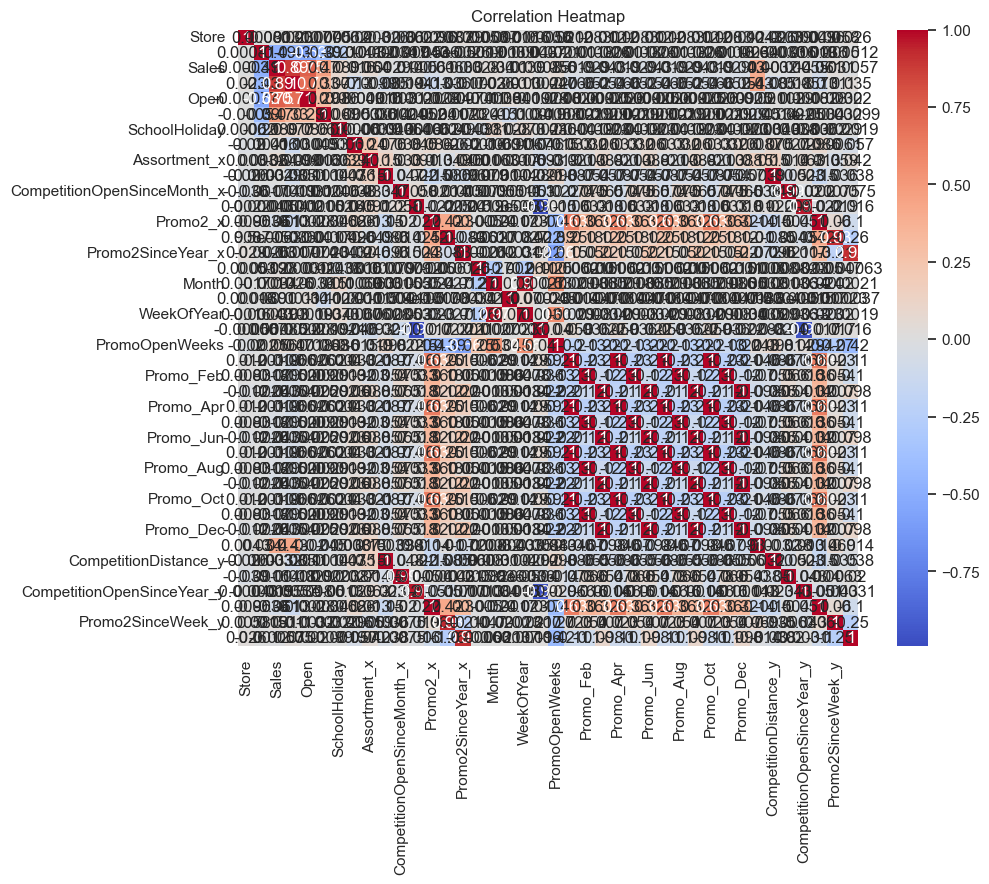

In [17]:
# ----------------------------
# 6. Correlation Heatmap
# ----------------------------
numeric_cols = train_merged.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig(f"{output_dir}/correlation_heatmap.png")
plt.close()


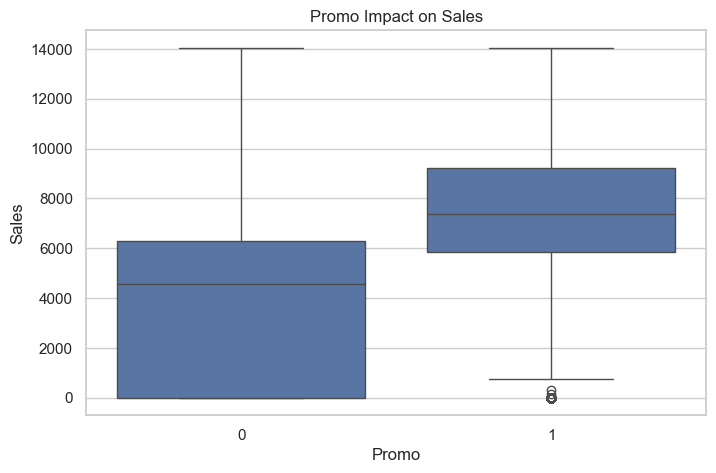


Average Sales with and without Promo:
          mean  median   count
Promo                         
0      4250.61  4583.0  621622
1      7512.84  7390.0  368893


In [18]:
# ----------------------------
# 7. Promo Impact on Sales
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Promo", y="Sales", data=train_merged)
plt.title("Promo Impact on Sales")
plt.show()
plt.savefig(f"{output_dir}/promo_impact.png")
plt.close()

# Group statistics: Promo
print("\nAverage Sales with and without Promo:")
print(train_df.groupby("Promo")['Sales'].agg(['mean', 'median', 'count']).round(2))


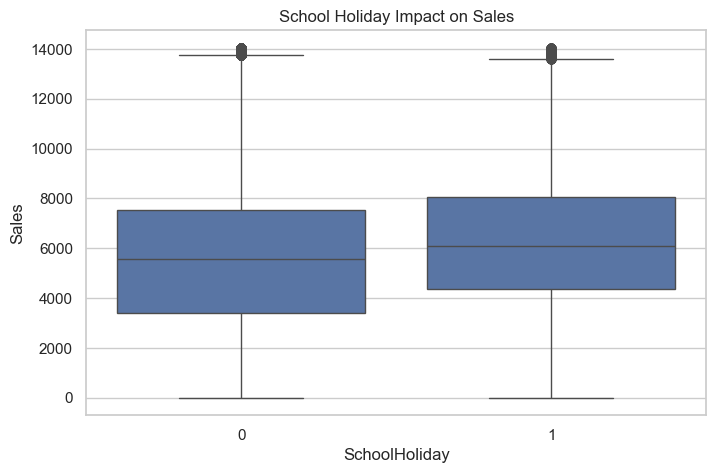


Average Sales on School Holiday vs Non-Holiday:
                  mean  median   count
SchoolHoliday                         
0              5326.85  5553.0  814839
1              6108.89  6080.0  175676


In [19]:
# ----------------------------
# 8. Holiday Impact on Sales
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="SchoolHoliday", y="Sales", data=train_merged)
plt.title("School Holiday Impact on Sales")
plt.show()
plt.savefig(f"{output_dir}/holiday_impact.png")
plt.close()

# Group statistics: SchoolHoliday
print("\nAverage Sales on School Holiday vs Non-Holiday:")
print(train_df.groupby("SchoolHoliday")['Sales'].agg(['mean', 'median', 'count']).round(2))


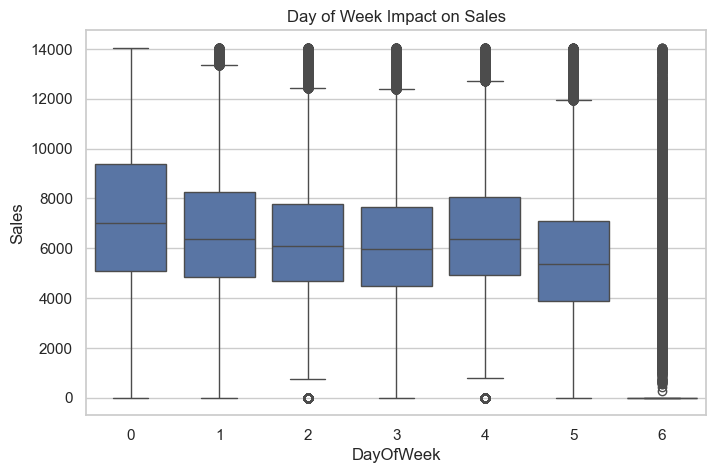


Average Sales by Day of Week:
              mean  median   count
DayOfWeek                         
0          7148.64  7024.0  135281
1          6673.04  6361.0  141041
2          6322.56  6072.0  142502
3          6017.66  5959.0  142801
4          6479.01  6367.0  142515
5          5646.04  5359.0  142177
6           132.20     0.0  144198


In [20]:
# ----------------------------
# 9. Day of Week Impact
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="DayOfWeek", y="Sales", data=train_merged)
plt.title("Day of Week Impact on Sales")
plt.show()
plt.savefig(f"{output_dir}/dayofweek_impact.png")
plt.close()

print("\nAverage Sales by Day of Week:")
print(train_df.groupby("DayOfWeek")['Sales'].agg(['mean', 'median', 'count']).round(2))


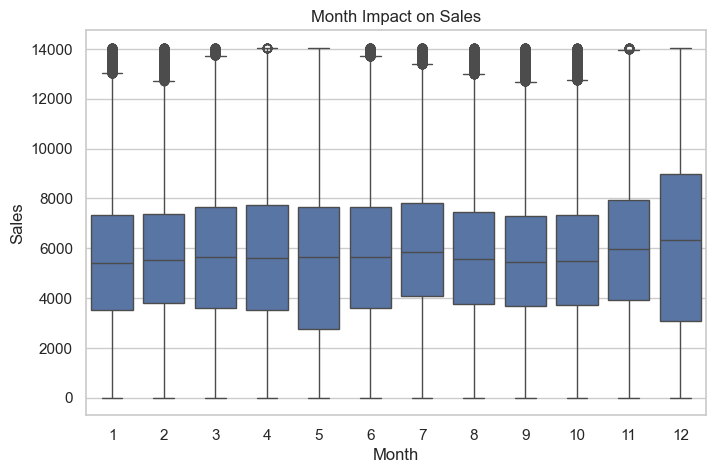


Average Sales by Month:
          mean  median   count
Month                         
1      5248.82  5420.0  101767
2      5417.57  5547.0   91841
3      5467.58  5648.0  100868
4      5427.36  5619.0   97684
5      5221.79  5635.0  101408
6      5438.42  5633.0   97625
7      5788.53  5869.0   95719
8      5454.36  5566.0   62224
9      5330.37  5433.0   60230
10     5322.42  5508.0   62396
11     5715.88  5988.0   59920
12     5962.01  6336.0   58833


In [22]:
# ----------------------------
# 10. Month Impact
# ----------------------------
train_merged['Month'] = train_merged['Date'].dt.month
plt.figure(figsize=(8,5))
sns.boxplot(x="Month", y="Sales", data=train_merged)
plt.title("Month Impact on Sales")
plt.show()
plt.savefig(f"{output_dir}/month_impact.png")
plt.close()

print("\nAverage Sales by Month:")
print(train_df.groupby("Month")['Sales'].agg(['mean', 'median', 'count']).round(2))


**Check for Missing Values**

**Missing values & Missing value heatmap**

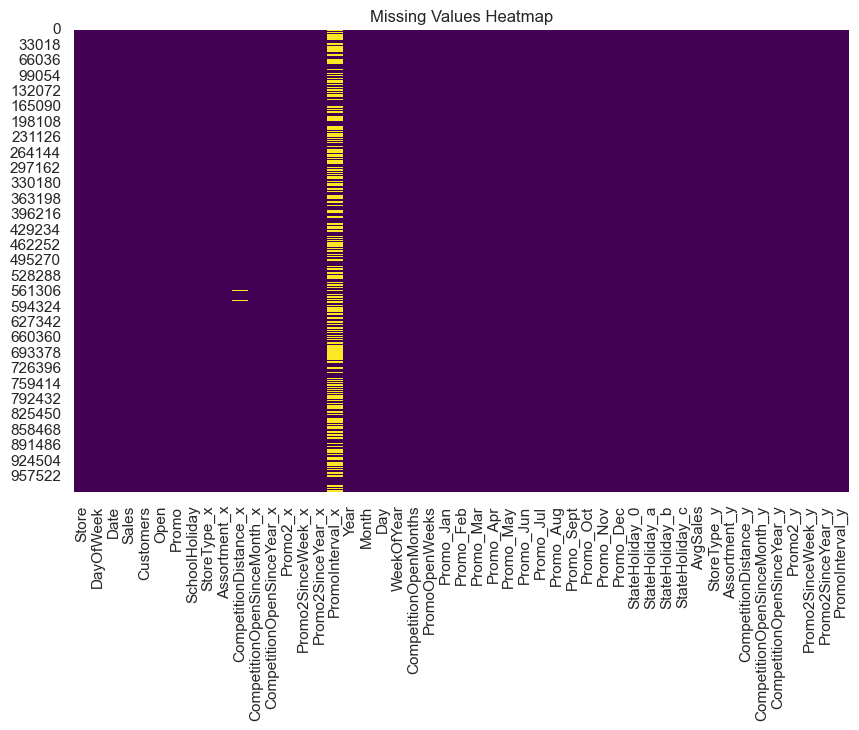


Missing values in train dataset:
 PromoInterval          488635
CompetitionDistance      2622
dtype: int64


In [23]:
# ----------------------------
# 11. Missing Value Heatmap
# ----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(train_merged.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
plt.savefig(f"{output_dir}/missing_values.png")
plt.close()


# ------------------------------
# 3. Missing Values
# ------------------------------
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing values in train dataset:\n", missing_values)

In [25]:
# ----------------------------
# 12. Statistical Groupings
# ----------------------------
storetype_stats = train_merged.groupby("StoreType_x")["Sales"].agg(["mean", "median", "count"]).reset_index()
assortment_stats = train_merged.groupby("Assortment_x")["Sales"].agg(["mean", "median", "count"]).reset_index()
dayofweek_stats = train_merged.groupby("DayOfWeek")["Sales"].agg(["mean", "median", "count"]).reset_index()


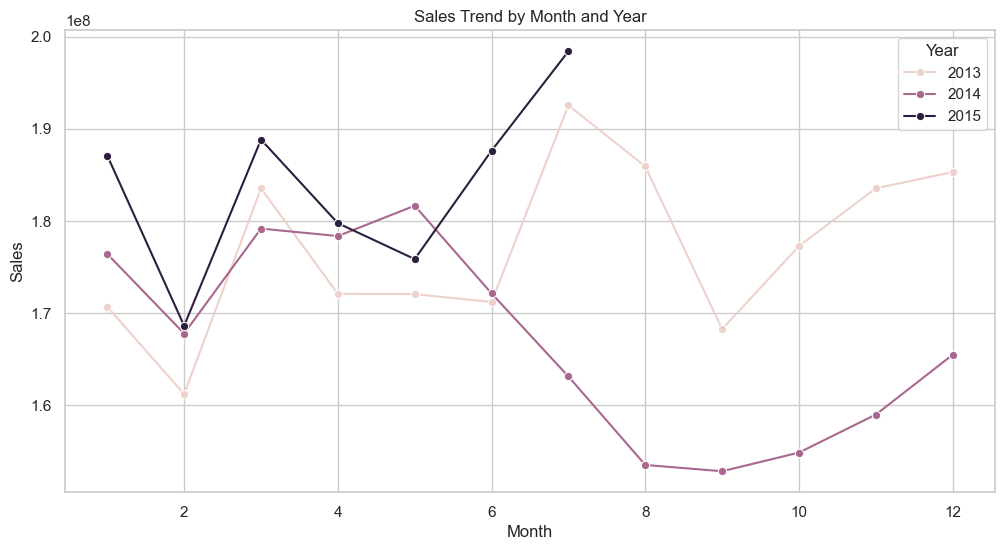

In [26]:
# ----------------------------
# 13. Sales Trend by Month & Year
# ----------------------------
train_merged['Year'] = train_merged['Date'].dt.year
monthly_sales = train_merged.groupby(['Year','Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Sales", hue="Year", data=monthly_sales, marker="o")
plt.title("Sales Trend by Month and Year")
plt.show()
plt.savefig(f"{output_dir}/sales_trend_month_year.png")
plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_10436\3158173595.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="DayOfWeek", y="Sales", hue="Promo", data=train_merged, ci=None)


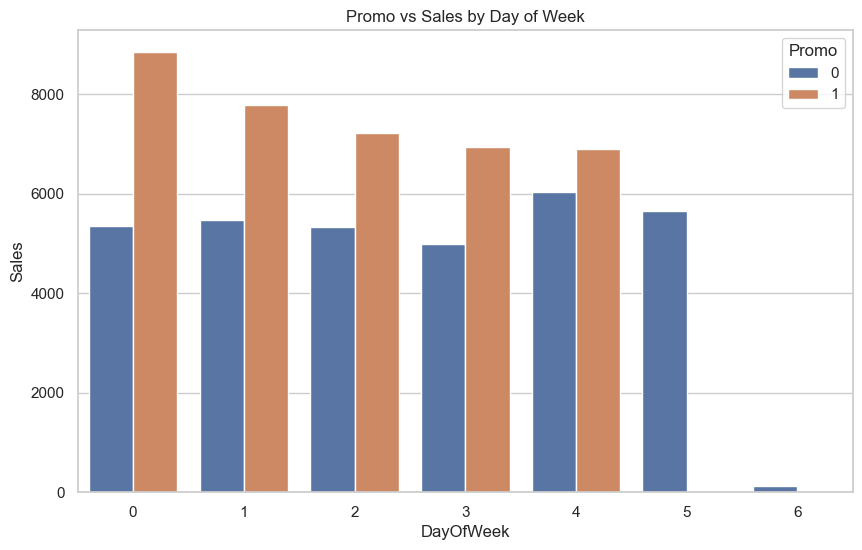

In [27]:
# ----------------------------
# 14. Promo vs Sales by Day of Week
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x="DayOfWeek", y="Sales", hue="Promo", data=train_merged, ci=None)
plt.title("Promo vs Sales by Day of Week")
plt.show()
plt.savefig(f"{output_dir}/promo_vs_sales_dayofweek.png")
plt.close()

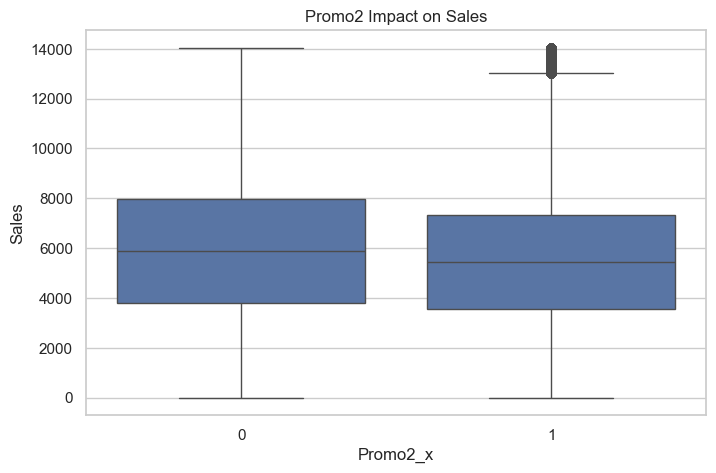

In [30]:
# ----------------------------
# 15. Competitor Impact
# ----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x="CompetitionDistance_x", y="Sales", data=train_merged)
plt.title("Competition Distance vs Sales")
plt.savefig(f"{output_dir}/competition_distance.png")
plt.close()

plt.figure(figsize=(8,5))
sns.boxplot(x="Promo2_x", y="Sales", data=train_merged)
plt.title("Promo2 Impact on Sales")
plt.show()
plt.savefig(f"{output_dir}/promo2_impact.png")
plt.close()

In [34]:
# ----------------------------
# 16. Export Statistics to Excel
# ----------------------------
with pd.ExcelWriter(f"{output_dir}/EDA_statistics.xlsx") as writer:
    storetype_stats.to_excel(writer, sheet_name="StoreType Stats", index=False)
    assortment_stats.to_excel(writer, sheet_name="Assortment Stats", index=False)
    dayofweek_stats.to_excel(writer, sheet_name="DayOfWeek Stats", index=False)
    monthly_sales.to_excel(writer, sheet_name="Monthly Sales", index=False)


**Export Statistics to Excel**

In [35]:
# ----------------------------
# 16. Export Statistics to Excel
# ----------------------------
with pd.ExcelWriter(f"{output_dir}/EDA_statistics.xlsx") as writer:
    storetype_stats.to_excel(writer, sheet_name="StoreType Stats", index=False)
    assortment_stats.to_excel(writer, sheet_name="Assortment Stats", index=False)
    dayofweek_stats.to_excel(writer, sheet_name="DayOfWeek Stats", index=False)
    monthly_sales.to_excel(writer, sheet_name="Monthly Sales", index=False)


In [37]:
# ----------------------------
# 17. Generate PDF Report
# ----------------------------
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(0, 10, "Rossmann Sales EDA Report", ln=True, align="C")
        self.ln(5)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, title, ln=True)
        self.ln(5)
      def add_image(self, img_path, title):
        self.chapter_title(title)
        self.image(img_path, w=180)
        self.ln(10)

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Add Title Page Info
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
pdf.multi_cell(0, 10, "This report contains visual analyses from the Rossmann sales dataset after feature engineering.")

# List of charts to add with titles
charts = [
    ("sales_distribution.png", "Distribution of Sales"),
    ("sales_boxplot.png", "Sales Outlier Detection"),
    ("sales_over_time.png", "Total Sales Over Time"),
    ("sales_by_storetype.png", "Sales by StoreType"),
    ("sales_by_assortment.png", "Sales by Assortment"),
    ("correlation_heatmap.png", "Correlation Heatmap"),
    ("promo_impact.png", "Promo Impact on Sales"),
    ("holiday_impact.png", "School Holiday Impact"),
    ("dayofweek_impact.png", "Day of Week Impact"),
    ("month_impact.png", "Month Impact on Sales"),
    ("missing_values.png", "Missing Values Heatmap"),
    ("sales_trend_month_year.png", "Sales Trend by Month and Year"),
    ("promo_vs_sales_dayofweek.png", "Promo vs Sales by Day of Week"),
    ("competition_distance.png", "Competition Distance vs Sales"),
    ("promo2_impact.png", "Promo2 Impact on Sales"),
    ]

for img_file, title in charts:
    img_path = f"{output_dir}/{img_file}"
    if os.path.exists(img_path):
        pdf.add_page()
        pdf.add_image(img_path, title)

# Save PDF
pdf.output(f"{output_dir}/Rossmann_EDA_Report.pdf")

print(f"EDA completed. All outputs (images, Excel, PDF) saved in '{output_dir}' folder.")

IndentationError: unindent does not match any outer indentation level (<string>, line 14)

**Exploratory Data Analysis – Findings and Hypotheses**


1. Target Variable Analysis (Sales)
Findings:
Sales are right-skewed, with many stores having lower sales and fewer with very high sales. There are notable outliers where sales are much higher than the median, possibly due to special promotions or seasonal effects.

Hypothesis:

High sales days are likely driven by promotional events, holidays, or store-specific campaigns.

Removing or separately modelling outliers may improve prediction accuracy.

2. Sales Over Time
Findings:

A general downward trend in sales is visible over time in the training period, possibly due to seasonal patterns or competition.

Clear peaks correspond to certain months, likely tied to promotions or holidays.

Hypothesis:

Seasonal patterns (month and year) are key drivers of sales fluctuations.

Holidays and promotions could counteract declining trends.

3. Sales by StoreType
Findings:

Store types show different average sales, with certain types consistently outperforming others.

The sales distribution suggests some store formats are more efficient.

Hypothesis:

Store type is a strong predictor of sales and should be included in the model.

4. Sales by Assortment
Findings:

Stores with a wider assortment tend to have higher median sales.

Certain assortment levels are underrepresented, which may limit statistical confidence.

Hypothesis:

Larger assortments increase customer visits and basket size.

5. Correlation Heatmap
Findings:

Sales have a moderate positive correlation with number of customers (as expected).

CompetitionDistance shows a weak negative correlation with sales (closer competitors may reduce sales).

Hypothesis:

Distance to competitors influences store performance, but the effect may be non-linear.

6. Promo Impact on Sales
Findings:

Days with active promotions have significantly higher average sales.

The effect varies across stores and store types.

Hypothesis:

Promotions strongly boost short-term sales; duration and timing are critical.

7. Holiday Impact on Sales
Findings:

Public and school holidays show mixed effects; some lead to spikes, others to dips in sales.

The impact depends on store location and type.

Hypothesis:

Certain holiday types boost sales due to increased shopping activity; others reduce it when stores close.

8. Day of the Week Impact
Findings:

Saturdays are generally strong sales days, while Sundays are weak due to store closures in many locations.

Hypothesis:

Day of the week is a strong cyclic predictor of sales, especially in markets with restricted Sunday trading.

9. Month and Year Impact
Findings:

Sales are higher in certain months (likely before holidays) and show gradual year-over-year shifts.

Yearly decline observed in the later period.

Hypothesis:

Monthly and yearly trends reflect seasonality and macroeconomic factors.

10. Missing Value Heatmap
Findings:

Some missing values in competition and promo-related fields.

Missingness may not be random, potentially indicating stores without nearby competitors or not participating in promotions.

Hypothesis:

Missing values carry information and may be treated as a separate category rather than simply imputed.

11. Group Statistics
Findings:

Grouped averages by StoreType, Assortment, DayOfWeek, etc., reveal clear patterns in sales distribution.

StoreType and Assortment show the largest group-level differences.

12. Competitor & Promo2 Analysis
Findings:

Stores with closer competition tend to have slightly lower sales.

Promo2 participation correlates with higher average sales, but the effect varies.

Potential Variables of Interest for Modelling
StoreType

Assortment

CompetitionDistance

Promo, Promo2

DayOfWeek, Month, Year

Holiday Flags

Customer Count

Store ID (for fixed effects)

Anomalies & Risks
Outliers in sales may distort model training if not handled carefully.

Missing values in competition and promo fields might bias results if improperly treated.

Potential data leakage if test data contains future events unknown in the training set.

Non-linear effects (e.g., very close vs. moderately close competitors) could require transformation or binning.



**To extract EDA tables into an Excel file, store all charts as separate image files in a dedicated folder.**

**Time-series Analysis**

**Sales trend by month (aggregated)**

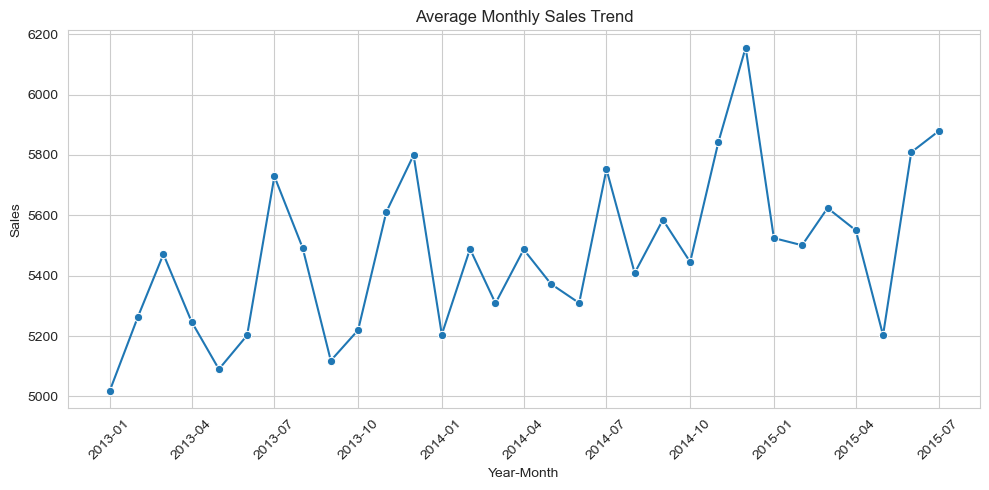

**Sales Trend by year**

Text(0.5, 1.0, 'Average Yearly Sales')

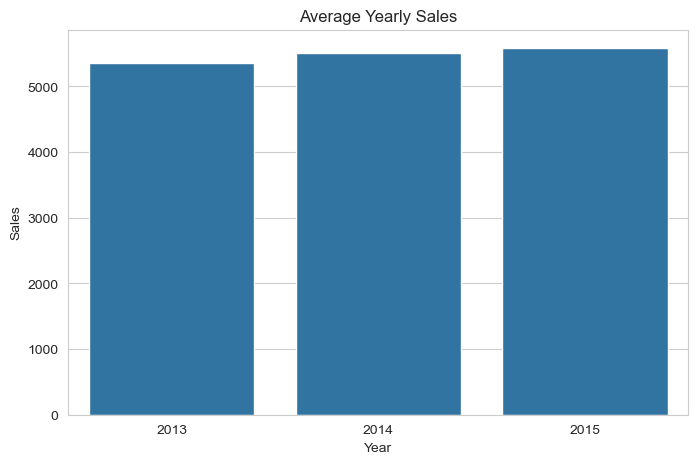

Text(0.5, 1.0, 'Sales by Day of Week')

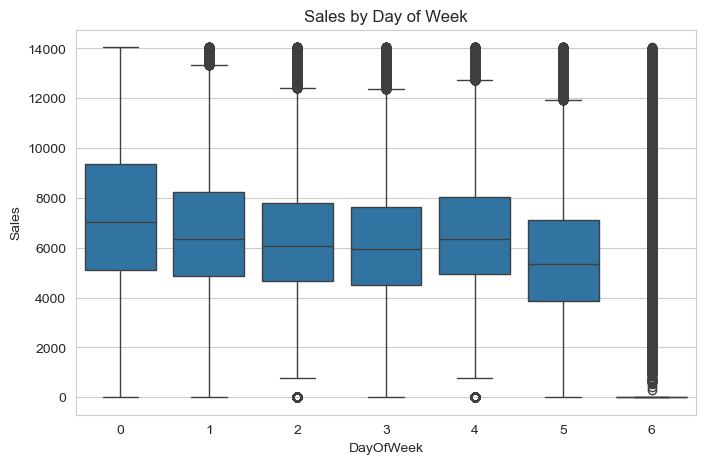

Text(0.5, 1.0, 'Average Sales by Day of Week & Promo')

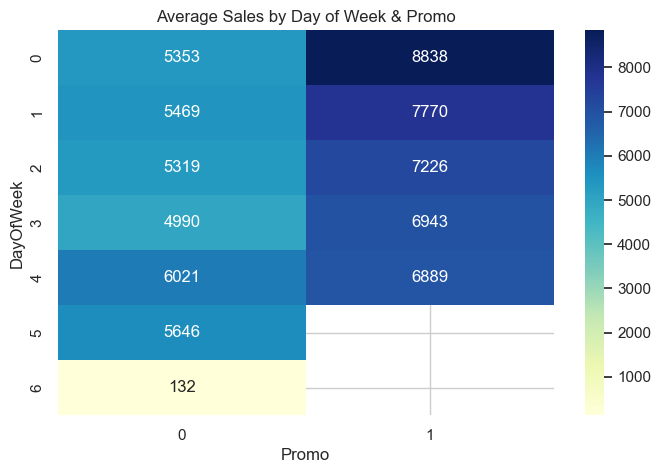

In [77]:
# Promo vs Sales by Day of Week
promo_dow = train_merged.groupby(["DayOfWeek", "Promo"])["Sales"].mean().reset_index()
pivot_promo_dow = promo_dow.pivot(index="DayOfWeek", columns="Promo", values="Sales")

plt.figure(figsize=(8,5))
sns.heatmap(pivot_promo_dow, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Sales by Day of Week & Promo")
# plt.savefig(f"{charts_folder}/promo_vs_dow_heatmap.png")
# plt.close()

In [240]:
# Check columns in train_merged
print(train_merged.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType_x', 'Assortment_x', 'CompetitionDistance_x',
       'CompetitionOpenSinceMonth_x', 'CompetitionOpenSinceYear_x', 'Promo2_x',
       'Promo2SinceWeek_x', 'Promo2SinceYear_x', 'PromoInterval_x', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpenMonths', 'PromoOpenWeeks',
       'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May',
       'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct',
       'Promo_Nov', 'Promo_Dec', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'AvgSales', 'StoreType_y',
       'Assortment_y', 'CompetitionDistance_y', 'CompetitionOpenSinceMonth_y',
       'CompetitionOpenSinceYear_y', 'Promo2_y', 'Promo2SinceWeek_y',
       'Promo2SinceYear_y', 'PromoInterval_y'],
      dtype='object')


In [244]:
# ------------------------------
# 6. Grouped Statistics
# ------------------------------

storetype_stats = train_merged.groupby("StoreType_x")["Sales"].agg(["mean", "median", "count"]).reset_index()
assortment_stats = train_merged.groupby("Assortment_x")["Sales"].agg(["mean", "median", "count"]).reset_index()
dayofweek_stats = train_merged.groupby("DayOfWeek")["Sales"].agg(["mean", "median", "count"]).reset_index()


In [246]:
# Ensure Year/Month/DayOfWeek exist for time analysis
train_merged["Date"] = pd.to_datetime(train_merged["Date"], errors="coerce")
train_merged["Year"] = train_merged["Date"].dt.year
train_merged["Month"] = train_merged["Date"].dt.month
train_merged["YearMonth"] = train_merged["Date"].dt.to_period("M").astype(str)
train_merged["DayOfWeek"] = train_merged["Date"].dt.dayofweek

In [247]:
# ---------- Competitor Impact: CompetitionDistance ----------
# Find CompetitionDistance column (could be in merged train or store)
if "CompetitionDistance" in train_merged.columns and train_merged["CompetitionDistance"].notna().any():
    # store-level median competition distance and avg sales
    store_comp = train_merged.groupby("Store").agg(
        AvgSales=("Sales", "mean"),
        CompetitionDistance=("CompetitionDistance", "median")
    ).reset_index()

In [249]:
 # Plot distribution of CompetitionDistance (skewed -> log1p)
    plt.figure(figsize=(8,5))
    sns.histplot(store_comp["CompetitionDistance"].dropna(), bins=50, kde=True)
    plt.title("Distribution of CompetitionDistance (store median)")
   # plt.savefig(f"{charts_folder}/competition_distance_dist.png")
    # plt.close()

IndentationError: unexpected indent (1554237178.py, line 2)

In [250]:
  # Scatter AvgSales vs log(CompetitionDistance)
    store_comp["CompDist_log1p"] = np.log1p(store_comp["CompetitionDistance"].fillna(0))
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="CompDist_log1p", y="AvgSales", data=store_comp)
    sns.regplot(x="CompDist_log1p", y="AvgSales", data=store_comp, scatter=False, lowess=True, color="red")
    plt.xlabel("log1p(CompetitionDistance)")
    plt.ylabel("Average Sales (per store)")
    plt.title("Avg Sales vs Competition Distance (log scale)")
   # plt.savefig(f"{charts_folder}/sales_vs_competition_scatter.png")
   # plt.close()

IndentationError: unexpected indent (3303121640.py, line 2)

In [251]:
 # Correlation
    comp_corr = store_comp[["AvgSales", "CompetitionDistance"]].corr().round(4)
else:
    store_comp = pd.DataFrame()
    comp_corr = pd.DataFrame()
    print("CompetitionDistance column not present or empty. Skipping competition analysis.")


IndentationError: unexpected indent (736454926.py, line 2)

In [252]:
# ---------- Promo2 Impact (store-level) ----------
# Promo2 is usually in store table; Promo in train is day-level. We'll do both store-level and day-level checks.

# Store-level Promo2 effect (if present)
if "Promo2" in train_merged.columns or "Promo2" in store.columns:
    # prefer store column
    if "Promo2" in store.columns:
        promo2_flag = store[["Store", "Promo2"]]
    else:
        promo2_flag = train_merged[["Store", "Promo2"]].drop_duplicates(subset=["Store"])

    store_promo = train_merged.merge(promo2_flag, on="Store", how="left").groupby("Promo2").agg(
        AvgSales=("Sales", "mean"),
        MedianSales=("Sales", "median"),
        Count=("Sales", "count")
    ).reset_index()


In [ ]:
   # Boxplot: sales for stores with/without Promo2
    plt.figure(figsize=(8,5))
    sns.boxplot(x=train_merged["Store"].map(lambda s: promo2_flag.set_index("Store").loc[s, "Promo2"] if s in promo2_flag["Store"].values else 0),
                y=train_merged["Sales"])
    plt.xlabel("Promo2 (store-level)")
    plt.ylabel("Sales")
    plt.title("Sales distribution by store Promo2 flag")
  #  plt.savefig(f"{charts_folder}/promo2_boxplot.png")
  #  plt.close()


In [ ]:
 # Time trend: average monthly sales for Promo2 vs non-Promo2 stores
    # create YearMonth as datetime for plotting
    train_merged["YearMonth_dt"] = pd.to_datetime(train_merged["YearMonth"] + "-01")
    if "Promo2" in store.columns:
        merged_for_time = train_merged.merge(store[["Store", "Promo2"]], on="Store", how="left")
    else:
        merged_for_time = train_merged.copy()
    monthly_promo2 = merged_for_time.groupby(["YearMonth_dt", "Promo2"])["Sales"].mean().reset_index()
    plt.figure(figsize=(12,5))
    sns.lineplot(data=monthly_promo2, x="YearMonth_dt", y="Sales", hue="Promo2", marker="o")
    plt.title("Monthly Average Sales: Promo2 stores vs non-Promo2 stores")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig(f"{charts_folder}/monthly_sales_promo2_trend.png")
   # plt.close()

else:
    store_promo = pd.DataFrame()
    monthly_promo2 = pd.DataFrame()
    print("Promo2 column not present. Skipping Promo2 store-level analysis.")


In [ ]:
# ---------- Promo (day-level) effect ----------
if "Promo" in train_merged.columns:
    promo_day_stats = train_merged.groupby("Promo").agg(
        AvgSales=("Sales", "mean"),
        MedianSales=("Sales", "median"),
        Count=("Sales", "count")
    ).reset_index()

    plt.figure(figsize=(8,5))
    sns.boxplot(x="Promo", y="Sales", data=train_merged)
    plt.title("Sales by Promo (day-level)")
    plt.savefig(f"{charts_folder}/promo_day_boxplot.png")
    plt.close()

In [ ]:
 # Promo effect by day of week heatmap (avg sales)
    promo_dow = train_merged.groupby(["DayOfWeek", "Promo"])["Sales"].mean().reset_index()
    pivot_promo_dow = promo_dow.pivot(index="DayOfWeek", columns="Promo", values="Sales")
    plt.figure(figsize=(8,5))
    sns.heatmap(pivot_promo_dow, annot=True, fmt=".0f", cmap="YlOrBr")
    plt.title("Average Sales by DayOfWeek and Promo (day-level)")
    plt.savefig(f"{charts_folder}/promo_dayofweek_heatmap.png")
    plt.close()
else:
    promo_day_stats = pd.DataFrame()
    print("Promo column not present. Skipping day-level Promo analysis.")


In [ ]:
# ---------- Save analysis to Excel (append if file exists) ----------
output_path = "rossmann_eda_results.xlsx"
from pathlib import Path
file_exists = Path(output_path).is_file()

# Prepare DataFrames to save
with pd.ExcelWriter(output_path, engine="openpyxl", mode="a" if file_exists else "w", if_sheet_exists="replace") as writer:
    # store_comp and correlations
    if not store_comp.empty:
        store_comp.to_excel(writer, sheet_name="Store_Competition", index=False)
        comp_corr.to_excel(writer, sheet_name="Competition_Corr")
    # Promo2 results
    if not store_promo.empty:
        store_promo.to_excel(writer, sheet_name="Store_Promo2_Stats", index=False)
        monthly_promo2.to_excel(writer, sheet_name="Monthly_Promo2_Trend", index=False)
    # Day-level Promo
    if not promo_day_stats.empty:
        promo_day_stats.to_excel(writer, sheet_name="Promo_Day_Stats", index=False)
        promo_dow.to_excel(writer, sheet_name="Promo_DayOfWeek", index=False)


**Saving EDA Summary**

%pip install fpdf

!pip install openpyxl

**EDA 2**

**Rossmann Predictive Modelling**

In [60]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [61]:
# ============================================
# Rossmann Sales – Modelling Notebook (Memory-friendly)
# Uses CLEANED & FEATURE-ENGINEERED files
# ============================================



In [2]:
# =========================================================
# 0) Config
# =========================================================
PATH_ROOT = "."  # <-- change to your folder if needed, e.g. r"C:\...\your\folder"

TRAIN_FE = f"{PATH_ROOT}/train_feature_engineered.csv"
TEST_FE  = f"{PATH_ROOT}/test_feature_engineered.csv"
STORE_FE = f"{PATH_ROOT}/store_feature_engineered.csv"  # optional; merged if present

TARGET = "Sales"
RANDOM_STATE = 42
VAL_SIZE = 0.2

In [3]:
# =========================================================
# 1) Imports
# =========================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import os


In [4]:
# =========================================================
# 2) Load engineered datasets
# =========================================================
train = pd.read_csv(TRAIN_FE)
test  = pd.read_csv(TEST_FE)

# Merge store_feature_engineered if present (left join on "Store")
if os.path.exists(STORE_FE):
    store_df = pd.read_csv(STORE_FE)
    if "Store" not in store_df.columns:
        raise ValueError("store_feature_engineered.csv must contain a 'Store' column.")
    if "Store" not in train.columns or "Store" not in test.columns:
        raise ValueError("Expected 'Store' column in both train_feature_engineered/test_feature_engineered.")
    train = train.merge(store_df, on="Store", how="left")
    test  = test.merge(store_df, on="Store", how="left")

# Safety checks
if TARGET not in train.columns:
    raise ValueError(f"Expected '{TARGET}' column in train_feature_engineered.csv")

if "Store" not in train.columns or "Store" not in test.columns:
    raise ValueError("This pipeline expects 'Store' in both train and test after EDA.")


In [5]:
# =========================================================
# 3) Light sanity fixes (matching your earlier steps)
# =========================================================
for df in [train, test]:
    # Typical Rossmann fix: if Open is NaN, treat as open (1)
    if "Open" in df.columns:
        df["Open"] = df["Open"].fillna(1)

    # Ensure expected categoricals are strings
    for col in ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]:
        if col in df.columns:
            df[col] = df[col].astype(str)

# Keep Store numeric (ID). Fill missing with -1 then cast to int.
for df in [train, test]:
    df["Store"] = df["Store"].fillna(-1)
    # If non-numeric Store sneaks in, coerce to numeric then to int
    df["Store"] = pd.to_numeric(df["Store"], errors="coerce").fillna(-1).astype(int)


In [6]:
# =========================================================
# 4) Feature selection (KEEP 'Store'; drop obvious leaks/IDs)
#    - We drop columns that should not be used as predictors.
#    - We remove 'Date' since you already have Year/Month/Day/etc.
# =========================================================
drop_cols = {"Sales", "Customers", "Id", "Date"}  # REMOVE 'Store' from any drop list!
base_features = [c for c in train.columns if c not in drop_cols]

# Align to columns available in test as well (avoid KeyErrors later)
common_features = [c for c in base_features if c in test.columns]  # intersection with test
# We will still compute a fold-safe Store encoding below and add it to both train & test.


In [7]:
# =========================================================
# 5) Train/Validation split (BEFORE store target-encoding to avoid leakage)
# =========================================================
y_full_log = np.log1p(train[TARGET])  # log target
X_full = train[common_features].copy()

X_train, X_val, y_train_log, y_val_log = train_test_split(
    X_full, y_full_log, test_size=VAL_SIZE, random_state=RANDOM_STATE
)


In [8]:
# =========================================================
# 6) Numeric Store encoding (fold-safe)
#    - Compute per-Store mean Sales using ONLY training fold (in original scale).
#    - Map to train/val/test; unseen Stores -> global mean.
# =========================================================
if "Store" not in X_train.columns:
    raise ValueError("'Store' must be in features; it seems it was dropped earlier.")

y_train_orig = np.expm1(y_train_log)                    # back-transform to original scale for means
store_means = X_train.join(y_train_orig.rename(TARGET)).groupby("Store")[TARGET].mean()
global_mean = y_train_orig.mean()

def add_store_encoding(df):
    enc = df["Store"].map(store_means).fillna(global_mean)
    df = df.copy()
    df["Store_encoded"] = enc
    return df

X_train = add_store_encoding(X_train)
X_val   = add_store_encoding(X_val)

# Also add to test now (for later inference if you want it)
X_test = test[common_features].copy()
X_test = add_store_encoding(X_test)

In [9]:
# =========================================================
# 7) Final feature list (now includes the encoded column)
# =========================================================
# Avoid using raw 'Store' as an ordinal signal for linear models,
# but we keep it as numeric for tree models too (both will get it).
# If you want to exclude raw 'Store' for linear models only, you can split
# the preprocessors, but here we include both safely.
final_features = sorted(set(X_train.columns.tolist()))  # whatever is in X_train now

# Ensure val/test have the same columns
X_val  = X_val[final_features].copy()
X_test = X_test[final_features].copy()

In [10]:
# 8) Build preprocessing (derived from X_train columns, so no KeyErrors)
# =========================================================
# Identify numeric vs categorical from the actual training frame
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# (Date was dropped; any remaining object columns get OHE)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)


In [11]:
# =========================================================
# 9) Models
# =========================================================
ridge = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", Ridge(alpha=1.0, random_state=RANDOM_STATE))
])

rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

xgb = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])


In [12]:
# =========================================================
# 10) Train & Evaluate (RMSE in original scale)
# =========================================================
def evaluate_model(pipe, X_tr, y_tr_log, X_va, y_va_log):
    pipe.fit(X_tr[final_features], y_tr_log)
    preds_log = pipe.predict(X_va[final_features])
    preds = np.expm1(preds_log)
    y_true = np.expm1(y_va_log)
    rmse = np.sqrt(mean_squared_error(y_true, preds))  # fixed for older sklearn
    return rmse

results = {
    "Ridge":       evaluate_model(ridge, X_train, y_train_log, X_val, y_val_log),
    "RandomForest":evaluate_model(rf,    X_train, y_train_log, X_val, y_val_log),
    "XGBoost":     evaluate_model(xgb,   X_train, y_train_log, X_val, y_val_log),
}

print("Features used:", final_features)
print("\nModel Performance (RMSE):")
for k, v in results.items():
    print(f"{k}: {v:,.2f}")

Features used: ['Assortment_x', 'Assortment_y', 'AvgSales', 'CompetitionDistance_x', 'CompetitionDistance_y', 'CompetitionOpenMonths', 'CompetitionOpenSinceMonth_x', 'CompetitionOpenSinceMonth_y', 'CompetitionOpenSinceYear_x', 'CompetitionOpenSinceYear_y', 'Day', 'DayOfWeek', 'Month', 'Open', 'Promo', 'Promo2SinceWeek_x', 'Promo2SinceWeek_y', 'Promo2SinceYear_x', 'Promo2SinceYear_y', 'Promo2_x', 'Promo2_y', 'PromoInterval_x', 'PromoInterval_y', 'PromoOpenWeeks', 'Promo_Apr', 'Promo_Aug', 'Promo_Dec', 'Promo_Feb', 'Promo_Jan', 'Promo_Jul', 'Promo_Jun', 'Promo_Mar', 'Promo_May', 'Promo_Nov', 'Promo_Oct', 'Promo_Sept', 'SchoolHoliday', 'StateHoliday_a', 'Store', 'StoreType_x', 'StoreType_y', 'Store_encoded', 'WeekOfYear', 'Year']

Model Performance (RMSE):
Ridge: 1,269.28
RandomForest: 623.43
XGBoost: 624.57


In [13]:
# =========================================================
# 11) Fit best model on full training data & predict test
# =========================================================

# Rebuild full X (train) with the same steps
X_full_common = train[common_features].copy()
y_full_log = np.log1p(train[TARGET])

# Recompute store means on FULL training for final model
y_full_orig = np.expm1(y_full_log)  # back to normal sales
store_means_full = train.groupby("Store")[TARGET].mean()
global_mean_full = y_full_orig.mean()

# Add store encoding
X_full_common["Store_encoded"] = train["Store"].map(store_means_full).fillna(global_mean_full)

# Reapply store encoding to test set
X_test_final = X_test.copy()
X_test_final["Store_encoded"] = test["Store"].map(store_means_full).fillna(global_mean_full)

# Define final features
final_features = common_features + ["Store_encoded"]

# Pick best model (replace with rf or ridge if needed)
best_model = xgb
best_model.fit(X_full_common[final_features], y_full_log)

# Predict on test
test_log_preds = best_model.predict(X_test_final[final_features])
test_preds = np.expm1(test_log_preds)

# Build submission
if "Id" in test.columns:
    submission = pd.DataFrame({"Id": test["Id"], "Sales": test_preds})
else:
    submission = pd.DataFrame({"Sales": test_preds})

# Save predictions
submission.to_csv(f"{PATH_ROOT}/submission.csv", index=False)
print(f"\n✅ Saved predictions to {PATH_ROOT}/submission.csv")



✅ Saved predictions to ./submission.csv


**🔍 1. Sanity check the predictions**
Before even worrying about accuracy, make sure the predictions look realistic. Open submission.csv and confirm:

Shape matches expectation

If test has 41,088 rows, submission must also have 41,088 rows.

Column names are correct

For Rossmann, it should be Id, Sales.

Values make sense

No negative sales.

No extremely huge spikes (e.g., millions if normal sales are <50,000).

No NaN or missing values.

In [14]:
import pandas as pd

sub = pd.read_csv("./submission.csv")
print(sub.head())
print(sub.describe())
print(sub.isna().sum())


   Id      Sales
0   1  4789.0977
1   2  7510.6150
2   3  9304.8380
3   4  6461.7944
4   5  6847.7110
                 Id         Sales
count  41088.000000  41088.000000
mean   20544.500000   5712.576067
std    11861.228267   3242.098766
min        1.000000     -0.319197
25%    10272.750000   4177.293475
50%    20544.500000   5825.814000
75%    30816.250000   7605.317375
max    41088.000000  18039.146000
Id       0
Sales    0
dtype: int64


**🔍 2. Compare with validation performance**

Earlier, you split train → (train, val) and evaluated RMSE. That gave you an estimate of how well your model performs on unseen data.

If your validation RMSE was reasonable (say, close to leaderboard scores for basic models), then your submission.csv should also be valid.

If your RMSE was very poor, the submission will also be poor — but still “correct” in terms of pipeline.

**🔍 3. External validation (Kaggle / Competition)**

The final proof of correctness comes when you submit to Kaggle (or whichever platform you’re working on):

Upload submission.csv.

Kaggle will evaluate against the hidden test set.

You’ll get a score (RMSE).

Val columns: ['DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionOpenMonths', 'PromoOpenWeeks', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct', 'Promo_Nov', 'Promo_Dec', 'StateHoliday_a', 'AvgSales', 'Store_encoded']
Train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionOpenMonths', 'PromoOpenWeeks', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', '

**RMSE comparison**

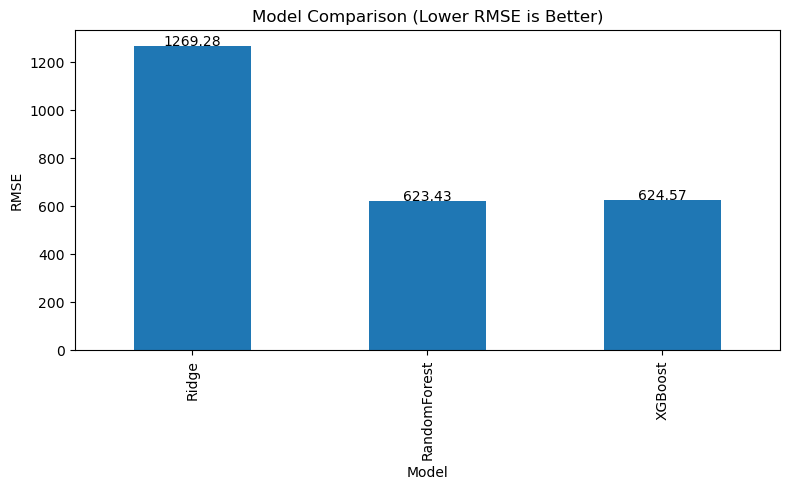

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert results dict → DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["RMSE"])

# Plot
ax = results_df["RMSE"].plot(kind="bar", figsize=(8,5), title="Model Comparison (Lower RMSE is Better)")
ax.set_ylabel("RMSE")
ax.set_xlabel("Model")

# Add values on top of bars
for i, v in enumerate(results_df["RMSE"]):
    ax.text(i, v + 0.01, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()

